<a href="https://colab.research.google.com/github/Shaddiess/Machine_Learning-And-Data-Mining-With-Python-and-Azure-_Machine_Learning_Studio/blob/main/_00715201_python_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb
%matplotlib inline
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import RegexpTokenizer
import string
from keras.models import Model
from keras.layers import Dense, Input, Dropout, LSTM, Activation
from keras.preprocessing import sequence
from keras.initializers import glorot_uniform
from keras.callbacks import EarlyStopping
from keras import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from keras.models import Sequential




import statsmodels.api as sm
from sklearn import model_selection


from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn import linear_model
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import precision_score



import re
from wordcloud import WordCloud
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder
np.random.seed(1)
from numpy import array
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import LSTM,Dense, Dropout, SpatialDropout1D, Bidirectional, Embedding
from tensorflow.keras.layers import Flatten
import tensorflow as tf
from tensorflow.keras.models import Sequential
import nltk

nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_eng is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_r

True

In [ ]:
df=pd.read_csv('/content/IoT.csv')

In [ ]:
df=df.dropna()

In [ ]:
df

,Room_Brightness,Room_Humidity,Room_Temperature,Room_Setpoint,Kitchen_SetPoint
0,14890405702,148902038944,148902069020,148901855216,148903713120
1,14890411750,148903710142,148903032419,148902035916,148904462316
2,14890417801,148903770541,148903634620,148902397215,148906619516
3,14890423843,148903948440,148903695020,148902875915,148907774920
4,14890429905,148904308241,148903755320,148903535215,148909502116
...,...,...,...,...,...
339,148948701253,149029087943,148964383619,148951294316,149662114016
340,148948761542,149029326544,148964504319,148951354817,149664300720
341,148948821856,149029504645,148964564720,148951415317,149664783616
342,148948879257,149029625647,148964625219,148951475717,149668380920


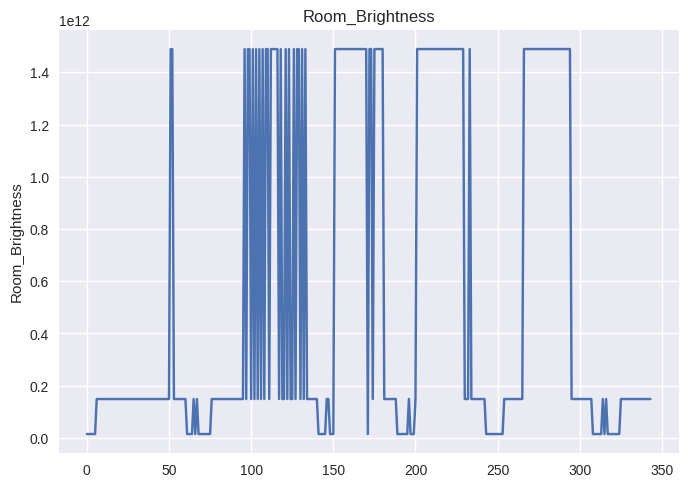

In [ ]:
plt.plot(df['Room_Brightness'])
plt.title('Room_Brightness')
plt.ylabel('Room_Brightness')
plt.show()

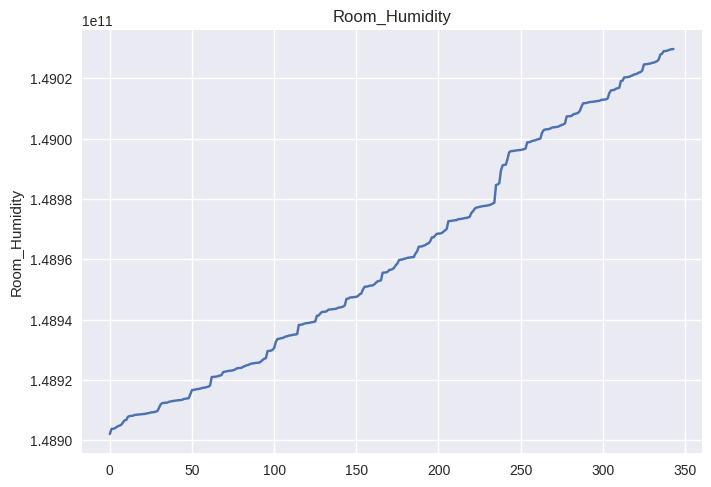

In [ ]:
plt.plot(df['Room_Humidity'])
plt.title('Room_Humidity')
plt.ylabel('Room_Humidity')
plt.show()

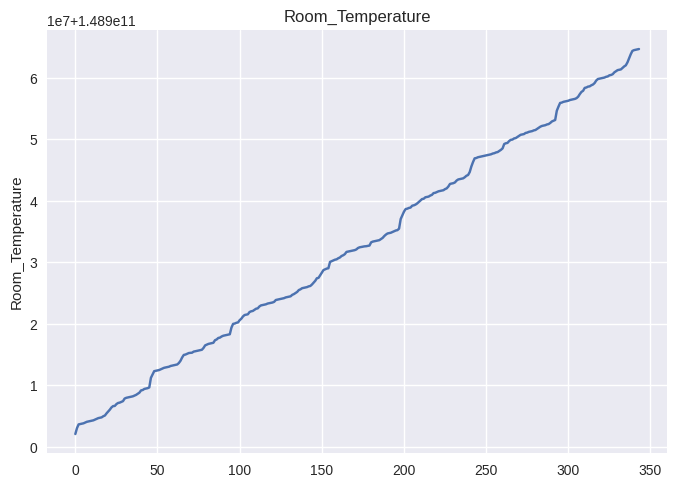

In [ ]:
plt.plot(df['Room_Temperature'])
plt.title('Room_Temperature')
plt.ylabel('Room_Temperature')
plt.show()

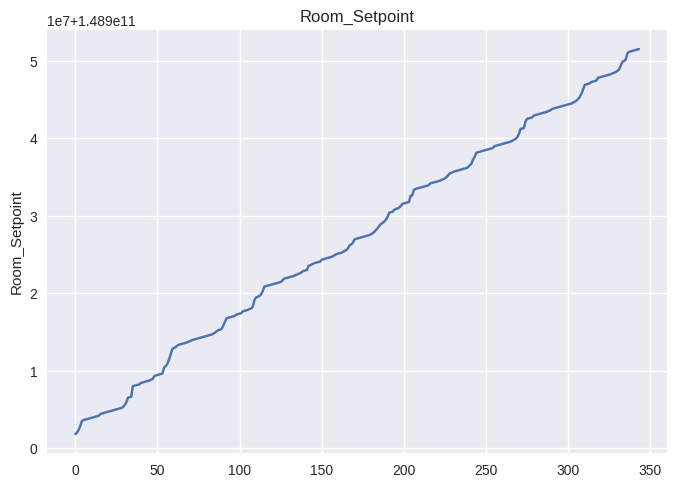

In [ ]:
plt.plot(df['Room_Setpoint'])
plt.title('Room_Setpoint')
plt.ylabel('Room_Setpoint')
plt.show()

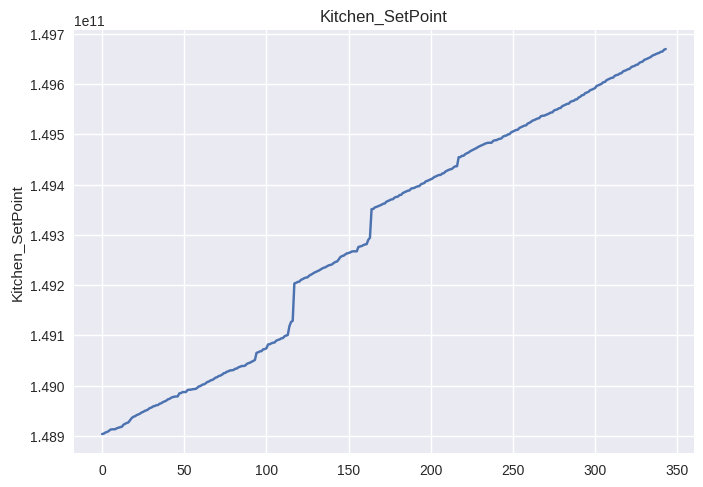

In [ ]:
plt.plot(df['Kitchen_SetPoint'])
plt.title('Kitchen_SetPoint')
plt.ylabel('Kitchen_SetPoint')
plt.show()

In [ ]:
pos = df[round(df['Room_Setpoint'],0) % 2 == 0]
neg = df[df['Room_Setpoint'] % 2 != 0]

print("Secure IoT Devices = ", len(pos))
print("\nInsecure IoT Devices = ", len(neg))

Secure IoT Devices =  167

Insecure IoT Devices =  177


In [ ]:
pos1 = df[round(df['Kitchen_SetPoint'],0) % 2 == 0]
neg1 = df[df['Kitchen_SetPoint'] % 2 != 0]

print("Energy Efficient IoT Devices = ", len(pos1))
print("\nEnergy Inefficient IoT Devices = ", len(neg1))

Energy Efficient IoT Devices =  343

Energy Inefficient IoT Devices =  1


In [ ]:
df['Security'] = np.where(df['Room_Setpoint'] % 2 == 0, 1, 0)
df['EnergyEfficiency'] = np.where(df['Kitchen_SetPoint'] % 3 == 0, 0, 1)
df

,Room_Brightness,Room_Humidity,Room_Temperature,Room_Setpoint,Kitchen_SetPoint,Security,EnergyEfficiency
0,14890405702,148902038944,148902069020,148901855216,148903713120,1,0
1,14890411750,148903710142,148903032419,148902035916,148904462316,1,0
2,14890417801,148903770541,148903634620,148902397215,148906619516,0,1
3,14890423843,148903948440,148903695020,148902875915,148907774920,0,1
4,14890429905,148904308241,148903755320,148903535215,148909502116,0,1
...,...,...,...,...,...,...,...
339,148948701253,149029087943,148964383619,148951294316,149662114016,1,1
340,148948761542,149029326544,148964504319,148951354817,149664300720,0,0
341,148948821856,149029504645,148964564720,148951415317,149664783616,0,1
342,148948879257,149029625647,148964625219,148951475717,149668380920,0,1


Text(0.5, 1.0, 'Distribution of IoT Security')

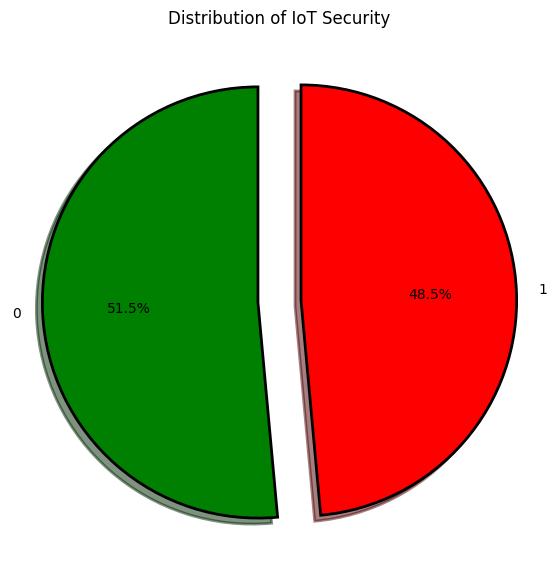

In [ ]:
fig = plt.figure(figsize=(7,7))
index = [0,1]
colors = ('green','red')
wp={'linewidth':2, 'edgecolor': 'black'}
tags=df['Security'].value_counts()
explode = (0.1,0.1)
tags.plot(kind='pie', autopct='%1.1f%%', shadow=True, colors=colors,startangle=90, wedgeprops=wp, explode=explode, label='')
plt.title('Distribution of IoT Security')

<ipython-input-13-442692e543c0>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


[Text(0, 0, '177'), Text(0, 0, '167')]

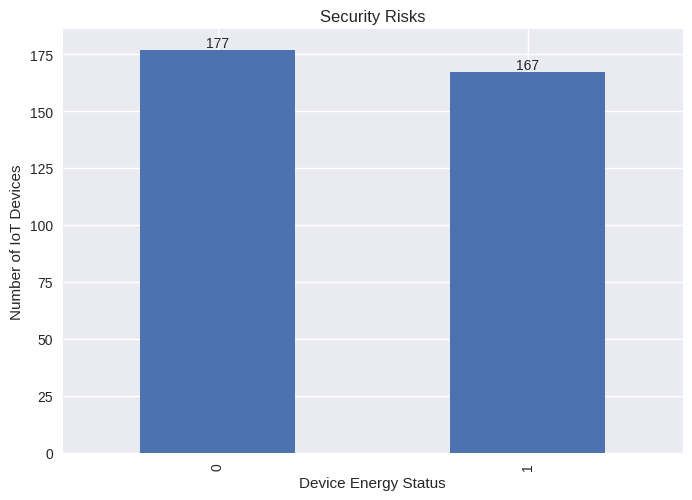

In [ ]:
plt.style.use('seaborn')

xf = df.groupby('Security')['Security'].count().plot(kind='bar', title='Security Risks',xlabel='Device Energy Status', ylabel='Number of IoT Devices', legend=False)
xf.bar_label(xf.containers[0], label_type='edge')

Text(0.5, 1.0, 'Distribution of Energy Efficiency')

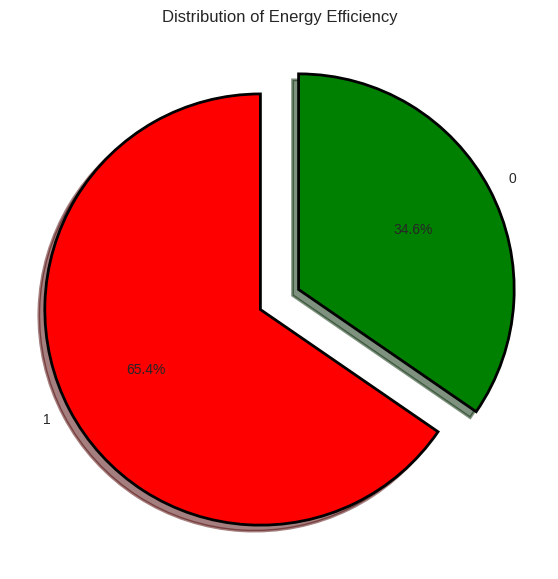

In [ ]:
fig = plt.figure(figsize=(7,7))
index = [0,1]
colors = ('red','green')
wp={'linewidth':2, 'edgecolor': 'black'}
tags=df['EnergyEfficiency'].value_counts()
explode = (0.1,0.1)
tags.plot(kind='pie', autopct='%1.1f%%', shadow=True, colors=colors,startangle=90, wedgeprops=wp, explode=explode, label='')
plt.title('Distribution of Energy Efficiency')

<ipython-input-15-cf37d8a793a1>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


[Text(0, 0, '119'), Text(0, 0, '225')]

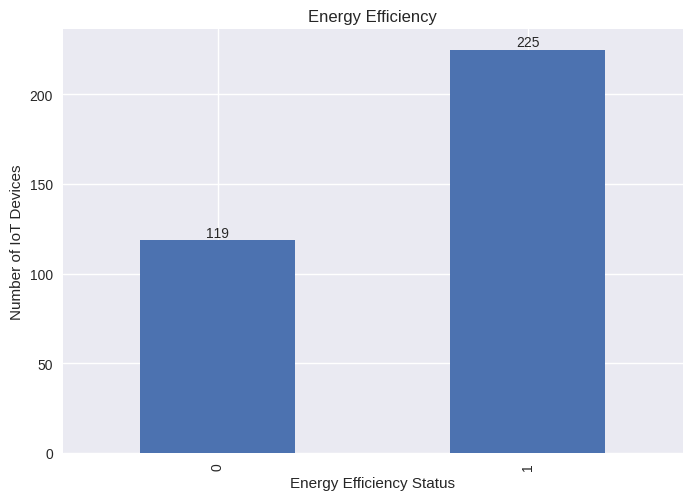

In [ ]:
plt.style.use('seaborn')

xf = df.groupby('EnergyEfficiency')['EnergyEfficiency'].count().plot(kind='bar', title='Energy Efficiency',xlabel='Energy Efficiency Status', ylabel='Number of IoT Devices', legend=False)
xf.bar_label(xf.containers[0], label_type='edge')

In [ ]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(df['Security'], df['EnergyEfficiency']))

[[ 57 120]
 [ 62 105]]


Text(70.72222222222221, 0.5, 'IoT Security')

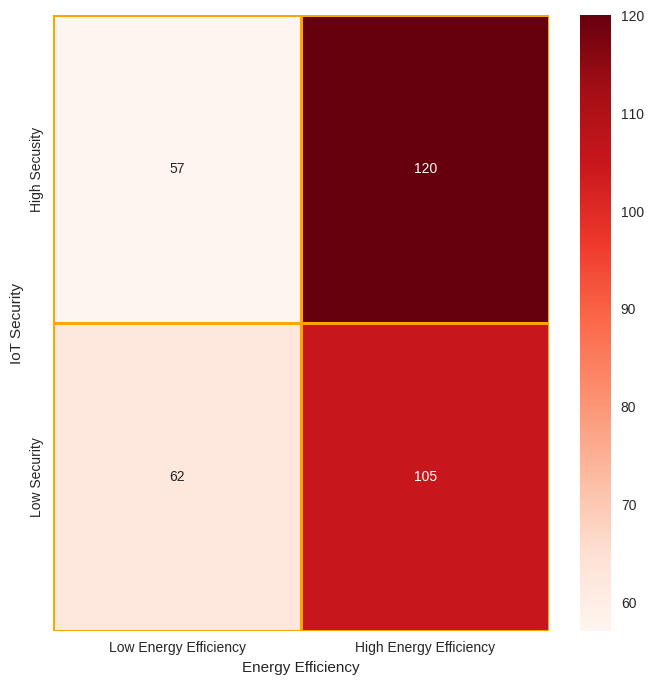

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
cm = confusion_matrix(df['Security'], df['EnergyEfficiency'])
plt.figure(figsize = (8,8))
sns.heatmap(cm,cmap= "Reds",
            linecolor = 'orange',
            linewidth = 1,
            annot = True,
            fmt='',
            xticklabels = ['Low Energy Efficiency','High Energy Efficiency'],
            yticklabels = ['High Secusity','Low Security'])
plt.xlabel("Energy Efficiency")
plt.ylabel("IoT Security")

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(df['Security'], df['EnergyEfficiency']))

              precision    recall  f1-score   support

           0       0.48      0.32      0.39       177
           1       0.47      0.63      0.54       167

    accuracy                           0.47       344
   macro avg       0.47      0.48      0.46       344
weighted avg       0.47      0.47      0.46       344



In [ ]:
t_df = df[['Security',"EnergyEfficiency"]]
t_df.shape
t_df.head(5)

,Security,EnergyEfficiency
0,1,0
1,1,0
2,0,1
3,0,1
4,0,1


In [ ]:
df11=df[['Room_Brightness','Room_Humidity','Room_Temperature','Room_Setpoint','Kitchen_SetPoint','Security','EnergyEfficiency']]

In [ ]:
df11.describe()

,Room_Brightness,Room_Humidity,Room_Temperature,Room_Setpoint,Kitchen_SetPoint,Security,EnergyEfficiency
count,3.440000e+02,3.440000e+02,3.440000e+02,3.440000e+02,3.440000e+02,344.000000,344.000000
mean,5.564876e+11,1.489614e+11,1.489328e+11,1.489272e+11,1.493007e+11,0.485465,0.654070
std,6.466508e+11,3.886419e+07,1.776528e+07,1.403866e+07,2.449118e+08,0.500517,0.476363
min,1.489041e+10,1.489020e+11,1.489021e+11,1.489019e+11,1.489037e+11,0.000000,0.000000
25%,1.489058e+11,1.489253e+11,1.489174e+11,1.489151e+11,1.490391e+11,0.000000,0.000000
50%,1.489252e+11,1.489566e+11,1.489322e+11,1.489271e+11,1.493621e+11,0.000000,1.000000
75%,1.489230e+12,1.489992e+11,1.489480e+11,1.489391e+11,1.495175e+11,1.000000,1.000000
max,1.489418e+12,1.490297e+11,1.489647e+11,1.489515e+11,1.496698e+11,1.000000,1.000000


In [ ]:
df12=df[['Security','Room_Brightness','Room_Humidity','Room_Temperature','Room_Setpoint','Kitchen_SetPoint']]

In [ ]:
round(df12.corr(),4)

,Security,Room_Brightness,Room_Humidity,Room_Temperature,Room_Setpoint,Kitchen_SetPoint
Security,1.0000,-0.0094,-0.0972,-0.0969,-0.1013,-0.1028
Room_Brightness,-0.0094,1.0000,0.1302,0.1604,0.1729,0.1970
Room_Humidity,-0.0972,0.1302,1.0000,0.9954,0.9913,0.9806
Room_Temperature,-0.0969,0.1604,0.9954,1.0000,0.9980,0.9872
Room_Setpoint,-0.1013,0.1729,0.9913,0.9980,1.0000,0.9892
Kitchen_SetPoint,-0.1028,0.1970,0.9806,0.9872,0.9892,1.0000


<Axes: >

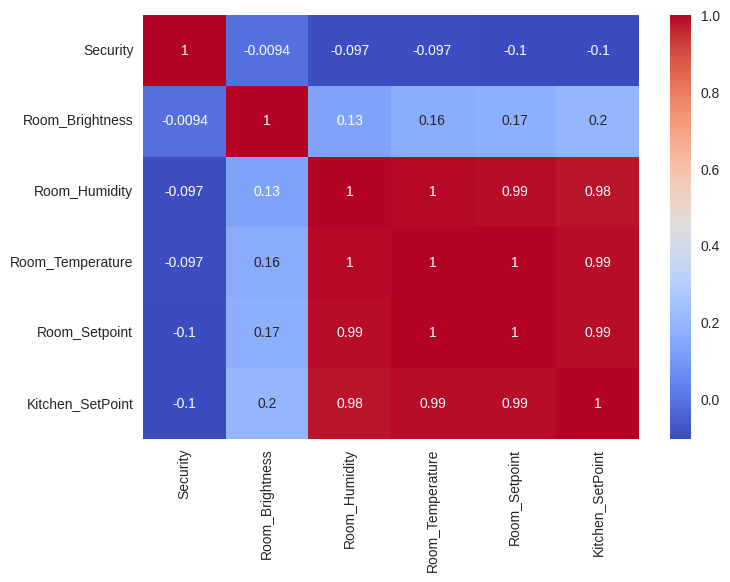

In [ ]:
sb.heatmap(round(df12.corr(),4), cmap='coolwarm', annot=True)

In [ ]:
df13=df[['EnergyEfficiency','Room_Brightness','Room_Humidity','Room_Temperature','Room_Setpoint','Kitchen_SetPoint']]

In [ ]:
round(df13.corr(),4)

,EnergyEfficiency,Room_Brightness,Room_Humidity,Room_Temperature,Room_Setpoint,Kitchen_SetPoint
EnergyEfficiency,1.0000,-0.0700,-0.0335,-0.0365,-0.0381,-0.0395
Room_Brightness,-0.0700,1.0000,0.1302,0.1604,0.1729,0.1970
Room_Humidity,-0.0335,0.1302,1.0000,0.9954,0.9913,0.9806
Room_Temperature,-0.0365,0.1604,0.9954,1.0000,0.9980,0.9872
Room_Setpoint,-0.0381,0.1729,0.9913,0.9980,1.0000,0.9892
Kitchen_SetPoint,-0.0395,0.1970,0.9806,0.9872,0.9892,1.0000


<Axes: >

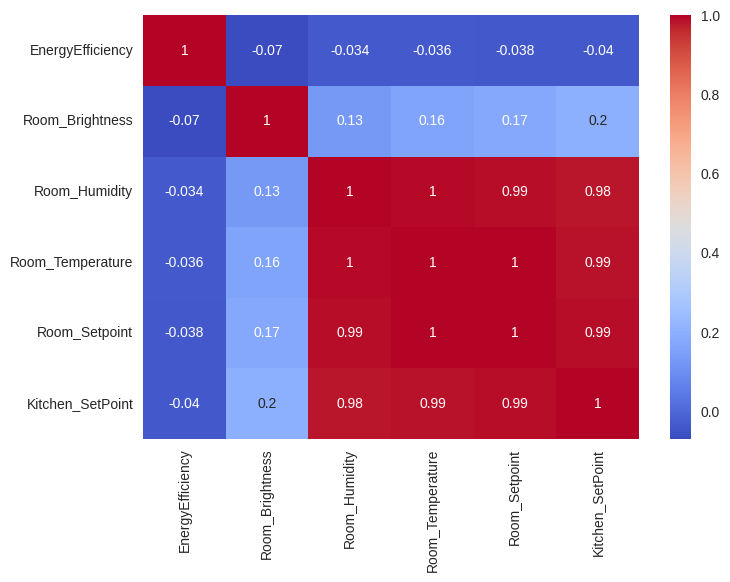

In [ ]:
sb.heatmap(round(df13.corr(),4), cmap='coolwarm', annot=True)

In [ ]:
#define dependent variable
y = df11['Security']
#define independent variables
x = df11[['Room_Brightness','Room_Humidity','Room_Temperature','Room_Setpoint','Kitchen_SetPoint']]
#adding Intercept
x = sm.add_constant(x)
#fitting the model
model = sm.OLS(y, x).fit()
#viewing the results
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               Security   R-squared:                       0.017
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     1.439
Date:                Tue, 13 Aug 2024   Prob (F-statistic):              0.221
Time:                        14:36:24   Log-Likelihood:                -246.63
No. Observations:                 344   AIC:                             503.3
Df Residuals:                     339   BIC:                             522.5
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             -2.98e-19   2.11e-19  

Text(0.5, 1.0, 'Security Vs Temperature')

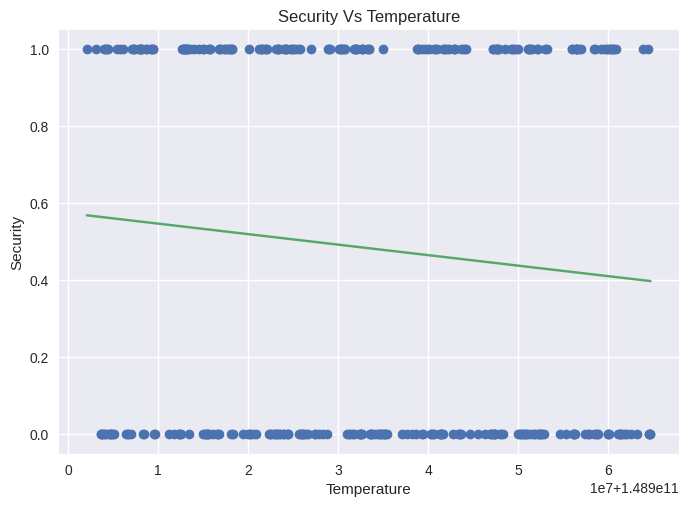

In [ ]:
x1=np.array(df11['Room_Temperature'])
y1=np.array(df11['Security'])
#create basic scatterplot
plt.plot(x1, y1, 'o')
#obtain m (slope) and b(intercept) of linear regression line
m, b = np.polyfit(x1, y1, 1)
#add linear regression line to scatterplot
plt.plot(x1, m*x1+b)
plt.xlabel('Temperature')
plt.ylabel('Security')
plt.title('Security Vs Temperature')

Text(0.5, 1.0, 'Security Vs Room Humidity')

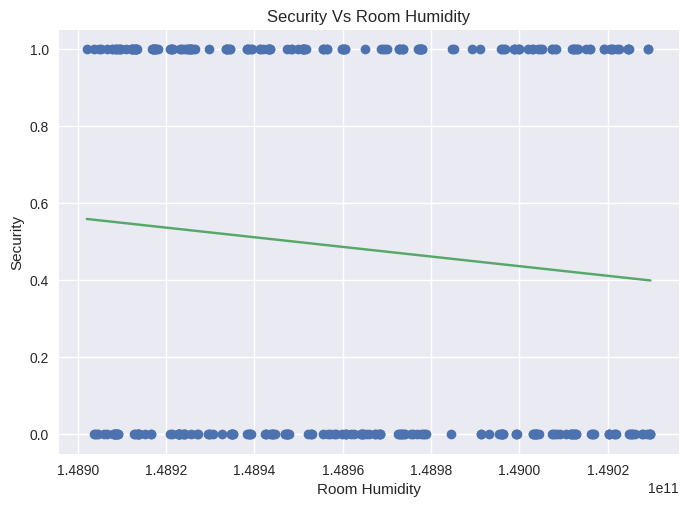

In [ ]:
x1=np.array(df11['Room_Humidity'])
y1=np.array(df11['Security'])
#create basic scatterplot
plt.plot(x1, y1, 'o')
#obtain m (slope) and b(intercept) of linear regression line
m, b = np.polyfit(x1, y1, 1)
#add linear regression line to scatterplot
plt.plot(x1, m*x1+b)
plt.xlabel('Room Humidity')
plt.ylabel('Security')
plt.title('Security Vs Room Humidity')

Text(0.5, 1.0, 'Security Vs Room_Brightness')

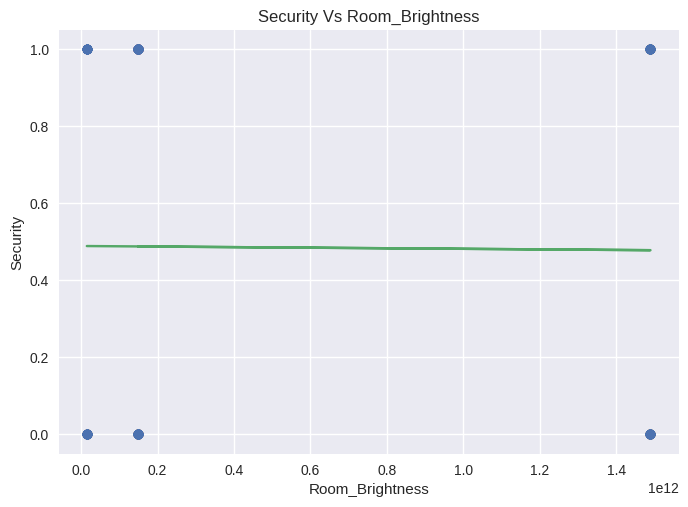

In [ ]:
x1=np.array(df11['Room_Brightness'])
y1=np.array(df11['Security'])
#create basic scatterplot
plt.plot(x1, y1, 'o')
#obtain m (slope) and b(intercept) of linear regression line
m, b = np.polyfit(x1, y1, 1)
#add linear regression line to scatterplot
plt.plot(x1, m*x1+b)
plt.xlabel('Room_Brightness')
plt.ylabel('Security')
plt.title('Security Vs Room_Brightness')

Text(0.5, 1.0, 'Security Vs Room_Setpoint')

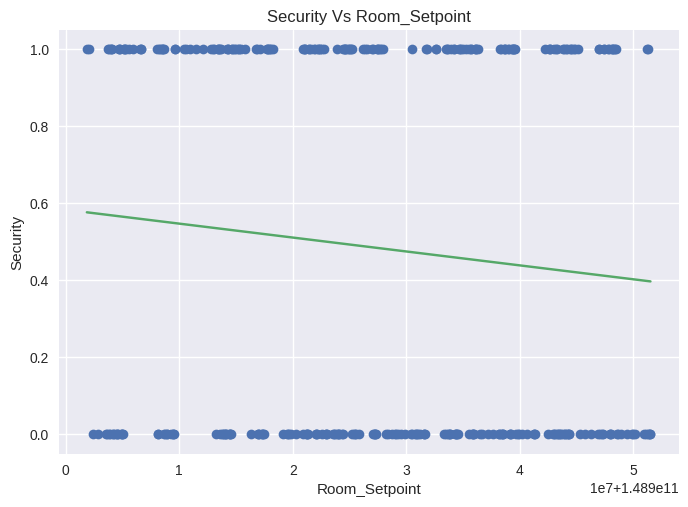

In [ ]:
x1=np.array(df11['Room_Setpoint'])
y1=np.array(df11['Security'])
#create basic scatterplot
plt.plot(x1, y1, 'o')
#obtain m (slope) and b(intercept) of linear regression line
m, b = np.polyfit(x1, y1, 1)
#add linear regression line to scatterplot
plt.plot(x1, m*x1+b)
plt.xlabel('Room_Setpoint')
plt.ylabel('Security')
plt.title('Security Vs Room_Setpoint')

Text(0.5, 1.0, 'Security Vs Kitchen_Setpoint')

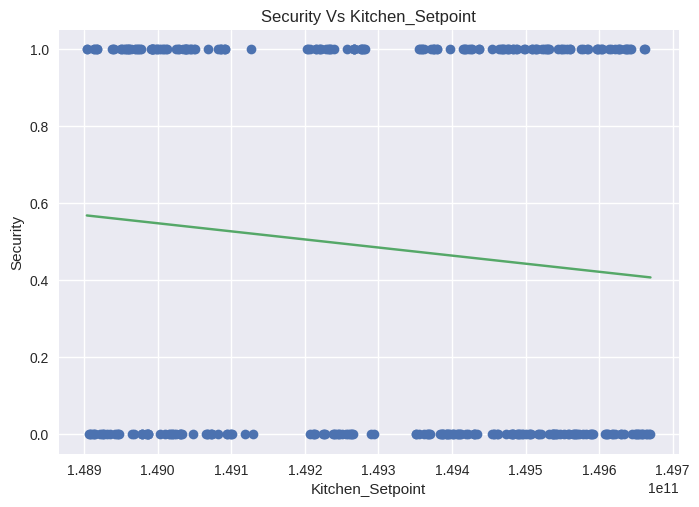

In [ ]:
x1=np.array(df11['Kitchen_SetPoint'])
y1=np.array(df11['Security'])
#create basic scatterplot
plt.plot(x1, y1, 'o')
#obtain m (slope) and b(intercept) of linear regression line
m, b = np.polyfit(x1, y1, 1)
#add linear regression line to scatterplot
plt.plot(x1, m*x1+b)
plt.xlabel('Kitchen_Setpoint')
plt.ylabel('Security')
plt.title('Security Vs Kitchen_Setpoint')

In [ ]:
best_features= SelectKBest(score_func=chi2, k=1)
fit= best_features.fit(x,y)

In [ ]:
df_scores= pd.DataFrame(fit.scores_)
df_columns= pd.DataFrame(x.columns)

X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.4,random_state=100)

In [ ]:
logreg= LogisticRegression()
logreg.fit(X_train,y_train)

LogisticRegression()

In [ ]:
y_pred=logreg.predict(X_test)
print (X_test) #test dataset
print (y_pred) #predicted values

     const  Room_Brightness  Room_Humidity  Room_Temperature  Room_Setpoint  \
308    1.0      14894262925   149016522543      148957712619   148945776615   
235    1.0     148933661067   148984596445      148943592620   148935993817   
7      1.0     148904477520   148905141844      148904057021   148903776516   
46     1.0     148906815935   148913731441      148911210720   148908877319   
319    1.0      14894726580   149021228442      148959867020   148947873518   
..     ...              ...            ...               ...            ...   
232    1.0     148933485796   148978146144      148943290820   148935815717   
85     1.0     148913559329   148925137840      148917328320   148914936016   
52     1.0    1489071777417   148916793938      148912597121   148909596018   
154    1.0    1489231679143   148949914241      148929035919   148924594216   
162    1.0    1489236297711   148952223238      148931022619   148925255617   

     Kitchen_SetPoint  
308      149609343716  
235

In [ ]:
y_pred_proba= logreg.predict_proba(X_test) [::,1]

In [ ]:
print("Accuracy: ", metrics.accuracy_score(y_test, y_pred))
print("CL Report:", metrics.classification_report(y_test, y_pred, zero_division=1))

Accuracy:  0.4782608695652174
CL Report:               precision    recall  f1-score   support

           0       0.48      1.00      0.65        66
           1       1.00      0.00      0.00        72

    accuracy                           0.48       138
   macro avg       0.74      0.50      0.32       138
weighted avg       0.75      0.48      0.31       138



In [ ]:
# real value
expected1 = y_test
# predicted value
predicted1 = y_pred
# calculate errors
errors = mean_squared_error(expected1, predicted1, squared=False)
# report error
print("Mean Square Error:", round(errors, 2))
mae = mean_absolute_error(expected1, predicted1)
print("Mean Absolute Error:",  round(mae, 2))
r2 = abs(r2_score(expected1, predicted1))
print("R-squared (R²) Score:", round(r2,7))
rmse = np.sqrt(mean_squared_error(expected1, predicted1))
print("Root Mean Squared Error (RMSE):", round(rmse,2))

score = abs(round(accuracy_score(expected1, predicted1),2))
print("The accuracy of the model is {}%".format(round(score, 2) *100))

Mean Square Error: 0.72
Mean Absolute Error: 0.52
R-squared (R²) Score: 1.0909091
Root Mean Squared Error (RMSE): 0.72
The accuracy of the model is 48.0%


In [ ]:
#define dependent variable
y = df11['EnergyEfficiency']
#define independent variables
x = df11[['Room_Brightness','Room_Humidity','Room_Temperature','Room_Setpoint','Kitchen_SetPoint']]
#adding Intercept
x = sm.add_constant(x)
#fitting the model
model = sm.OLS(y, x).fit()
#viewing the results
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:       EnergyEfficiency   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                 -0.006
Method:                 Least Squares   F-statistic:                    0.4835
Date:                Tue, 13 Aug 2024   Prob (F-statistic):              0.748
Time:                        14:24:38   Log-Likelihood:                -231.53
No. Observations:                 344   AIC:                             473.1
Df Residuals:                     339   BIC:                             492.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -1.895e-20   2.02e-19  

Text(0.5, 1.0, 'EnergyEfficiency Vs Temperature')

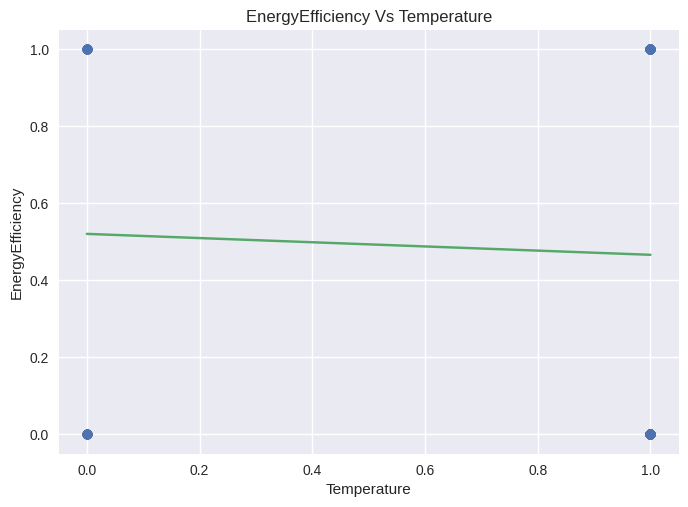

In [ ]:
x1=np.array(df11['EnergyEfficiency'])
y1=np.array(df11['Security'])
#create basic scatterplot
plt.plot(x1, y1, 'o')
#obtain m (slope) and b(intercept) of linear regression line
m, b = np.polyfit(x1, y1, 1)
#add linear regression line to scatterplot
plt.plot(x1, m*x1+b)
plt.xlabel('Temperature')
plt.ylabel('EnergyEfficiency')
plt.title('EnergyEfficiency Vs Temperature')

Text(0.5, 1.0, 'EnergyEfficiency Vs Room Humidity')

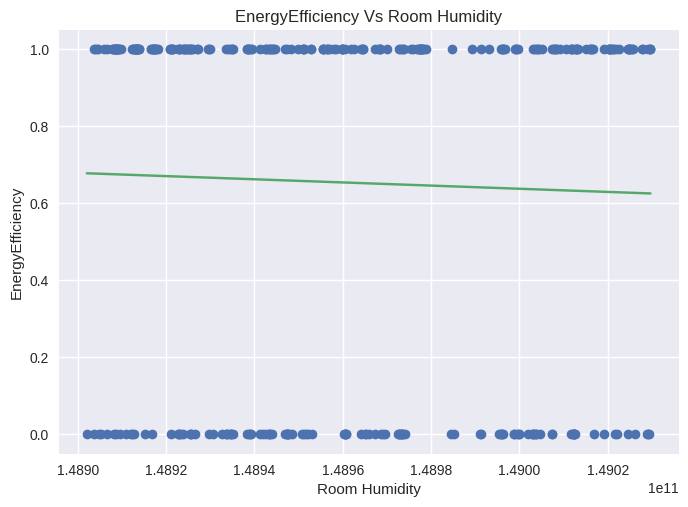

In [ ]:
x1=np.array(df11['Room_Humidity'])
y1=np.array(df11['EnergyEfficiency'])
#create basic scatterplot
plt.plot(x1, y1, 'o')
#obtain m (slope) and b(intercept) of linear regression line
m, b = np.polyfit(x1, y1, 1)
#add linear regression line to scatterplot
plt.plot(x1, m*x1+b)
plt.xlabel('Room Humidity')
plt.ylabel('EnergyEfficiency')
plt.title('EnergyEfficiency Vs Room Humidity')

Text(0.5, 1.0, 'EnergyEfficiency Vs Room_Brightness')

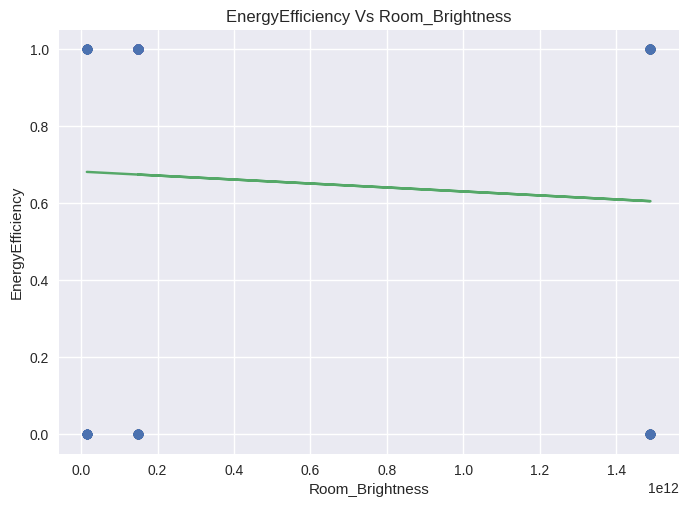

In [ ]:
x1=np.array(df11['Room_Brightness'])
y1=np.array(df11['EnergyEfficiency'])
#create basic scatterplot
plt.plot(x1, y1, 'o')
#obtain m (slope) and b(intercept) of linear regression line
m, b = np.polyfit(x1, y1, 1)
#add linear regression line to scatterplot
plt.plot(x1, m*x1+b)
plt.xlabel('Room_Brightness')
plt.ylabel('EnergyEfficiency')
plt.title('EnergyEfficiency Vs Room_Brightness')

Text(0.5, 1.0, 'EnergyEfficiency Vs Room_Setpoint')

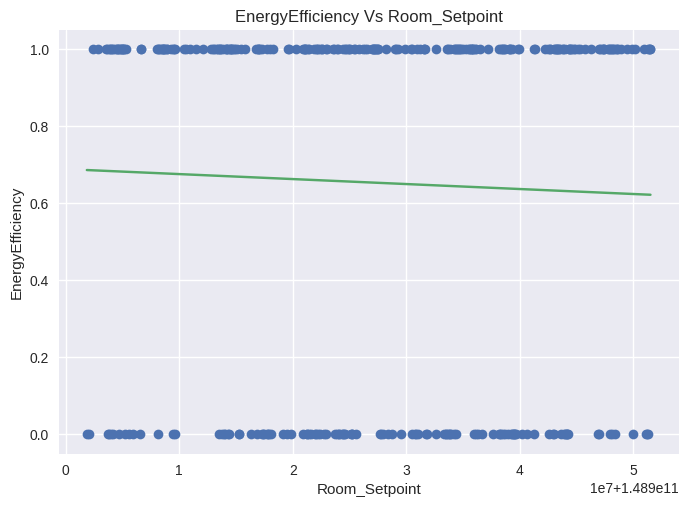

In [ ]:
x1=np.array(df11['Room_Setpoint'])
y1=np.array(df11['EnergyEfficiency'])
#create basic scatterplot
plt.plot(x1, y1, 'o')
#obtain m (slope) and b(intercept) of linear regression line
m, b = np.polyfit(x1, y1, 1)
#add linear regression line to scatterplot
plt.plot(x1, m*x1+b)
plt.xlabel('Room_Setpoint')
plt.ylabel('EnergyEfficiency')
plt.title('EnergyEfficiency Vs Room_Setpoint')

Text(0.5, 1.0, 'EnergyEfficiency Vs Kitchen_Setpoint')

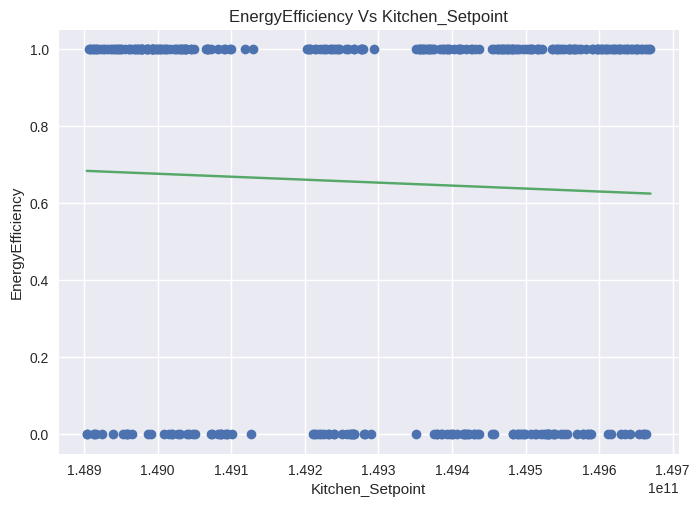

In [ ]:
x1=np.array(df11['Kitchen_SetPoint'])
y1=np.array(df11['EnergyEfficiency'])
#create basic scatterplot
plt.plot(x1, y1, 'o')
#obtain m (slope) and b(intercept) of linear regression line
m, b = np.polyfit(x1, y1, 1)
#add linear regression line to scatterplot
plt.plot(x1, m*x1+b)
plt.xlabel('Kitchen_Setpoint')
plt.ylabel('EnergyEfficiency')
plt.title('EnergyEfficiency Vs Kitchen_Setpoint')

In [ ]:
best_features= SelectKBest(score_func=chi2, k=1)
fit= best_features.fit(x,y)

In [ ]:
df_scores= pd.DataFrame(fit.scores_)
df_columns= pd.DataFrame(x.columns)

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.4,random_state=100)

In [ ]:
logreg= LogisticRegression()
logreg.fit(X_train,y_train)

LogisticRegression()

In [ ]:
y_pred=logreg.predict(X_test)
print (X_test) #test dataset
print (y_pred) #predicted values

     const  Room_Brightness  Room_Humidity  Room_Temperature  Room_Setpoint  \
308    1.0      14894262925   149016522543      148957712619   148945776615   
235    1.0     148933661067   148984596445      148943592620   148935993817   
7      1.0     148904477520   148905141844      148904057021   148903776516   
46     1.0     148906815935   148913731441      148911210720   148908877319   
319    1.0      14894726580   149021228442      148959867020   148947873518   
..     ...              ...            ...               ...            ...   
232    1.0     148933485796   148978146144      148943290820   148935815717   
85     1.0     148913559329   148925137840      148917328320   148914936016   
52     1.0    1489071777417   148916793938      148912597121   148909596018   
154    1.0    1489231679143   148949914241      148929035919   148924594216   
162    1.0    1489236297711   148952223238      148931022619   148925255617   

     Kitchen_SetPoint  
308      149609343716  
235

In [ ]:
y_pred_proba= logreg.predict_proba(X_test) [::,1]

In [ ]:
print("Accuracy: ", metrics.accuracy_score(y_test, y_pred))
print("CL Report:", metrics.classification_report(y_test, y_pred, zero_division=1))

Accuracy:  0.6231884057971014
CL Report:               precision    recall  f1-score   support

           0       1.00      0.00      0.00        52
           1       0.62      1.00      0.77        86

    accuracy                           0.62       138
   macro avg       0.81      0.50      0.38       138
weighted avg       0.77      0.62      0.48       138



In [ ]:
# real value
expected1 = y_test
# predicted value
predicted1 = y_pred
# calculate errors
errors = mean_squared_error(expected1, predicted1, squared=False)
# report error
print("Mean Square Error:", round(errors, 2))
mae = mean_absolute_error(expected1, predicted1)
print("Mean Absolute Error:",  round(mae, 2))
r2 = abs(r2_score(expected1, predicted1))
print("R-squared (R²) Score:", round(r2,7))
rmse = np.sqrt(mean_squared_error(expected1, predicted1))
print("Root Mean Squared Error (RMSE):", round(rmse,2))

score = abs(round(accuracy_score(expected1, predicted1),2))
print("The accuracy of the model is {}%".format(round(score, 2) *100))

Mean Square Error: 0.61
Mean Absolute Error: 0.38
R-squared (R²) Score: 0.6046512
Root Mean Squared Error (RMSE): 0.61
The accuracy of the model is 62.0%
